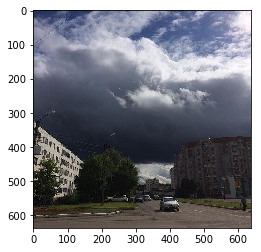

In [109]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from skimage.io import imread
#im = imread('/home/tamerlan/CV/task2/img.png', plugin ='matplotlib')
im = imread('/home/tamerlan/CV/task2/fotka.jpg', plugin ='matplotlib')
mask = np.zeros((im.shape[0],im.shape[1]))
# mask = imread('/home/tamerlan/CV/task2/mask.png',plugin ='matplotlib')
#im = imread('/home/tamerlan/CV/task2/img.png')
implot = plt.imshow(im)
#im*=255
plt.imshow(im)
plt.show()

In [371]:
from math import sqrt 
grad = np.zeros( (im.shape[0],im.shape[1]), dtype=np.float32)
grad_x = np.zeros( (im.shape[0],im.shape[1]), dtype=np.float32)
grad_y = np.zeros( (im.shape[0],im.shape[1]), dtype=np.float32)
Y = np.dot(im, np.array([0.299, 0.587, 0.114]))

In [372]:
grad_x = np.roll(Y,1,0) - np.roll(Y,-1,0)
grad_x[0] = Y[1,:] - Y[0,:]
grad_x[grad_x.shape[0]-1] = Y[grad_x.shape[0]-1,:] - Y[grad_x.shape[0]-2,:]

grad_y = np.roll(Y,1,1) - np.roll(Y,-1,1)
grad_y[:,0] = Y[:,1] - Y[:,0]
grad_y[:,grad_y.shape[1]-1] = Y[:,grad_x.shape[1]-1] - Y[:,grad_x.shape[1]-2]

grad = (grad_x**2 + grad_y**2)**(0.5)

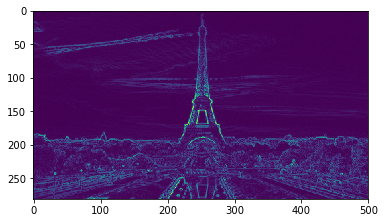

In [373]:
plt.imshow(grad)
plt.show()

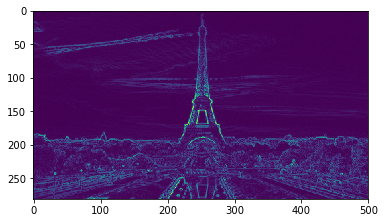

In [374]:

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if i + 1 == im.shape[0]:
            x_plus = im.shape[0] - 1
            x_minus = im.shape[0] - 2
        elif i - 1 < 0:
            x_plus = 1
            x_minus = 0
        else: 
            x_plus = i + 1
            x_minus = i - 1
            
        if j + 1 == im.shape[1]:
            y_plus = im.shape[1] - 1
            y_minus = im.shape[1] - 2
        elif j - 1 < 0:
            y_plus = 1
            y_minus = 0
        else :
            y_plus = j + 1
            y_minus = j - 1
        grad_x[i,j] = Y[x_plus ,j] - Y[x_minus,j]
        grad_y[i,j] = Y[i, y_plus] - Y[i, y_minus]
grad = (grad_x**2 + grad_y**2)**(0.5)

plt.imshow(grad)
plt.show()

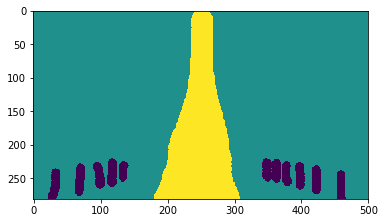

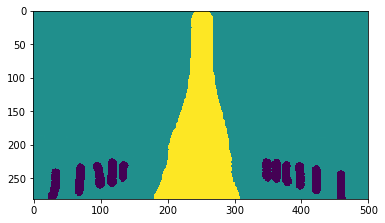

In [375]:
#threshold, upper, lower = 0.5, 1, 0
#mask[...,0] = np.where(mask[...,0]>threshold, upper, lower)
#mask[...,1] = np.where(mask[...,1]>threshold, upper, lower)
#mask[...,0] = mask[...,0]*(-1)*im.shape[0]*im.shape[1]
#mask[...,1] = mask[...,1]*im.shape[0]*im.shape[1]



def convert_img_to_mask(img):
        return ((img[:, :, 0] != 0) * -1 + (img[:, :, 1] != 0)).astype('int8')
mask = convert_img_to_mask(mask)
plt.imshow(mask)
plt.show()

grad = grad + mask*256

plt.imshow(grad)
plt.show()

In [376]:
def min2(a,b):
    if a<b :
        return 0
    else :
        return 1

def min3(a,b,c):
    if a<=b and a<c:
        return -1
    elif c<b:
        return 1
    else :
        return 0

    
min_seam = np.zeros( (im.shape[0],im.shape[1]), dtype=np.float32)
min_seam[0,...] = grad[0,...]
for i in range(1, im.shape[0]):
    for j in range(0,im.shape[1]):
        if j == 0:
            min_ind = j + min2(min_seam[i-1,j],min_seam[i-1,j+1]  )
        elif j == im.shape[1]-1: 
            min_ind = j + min2(min_seam[i-1,j-1],min_seam[i-1,j] ) - 1
        else:
            min_ind = j + min3(min_seam[i-1,j-1],min_seam[i-1,j],min_seam[i-1,j+1]  ) 
        min_seam[i,j] = grad[i,j] + min_seam[i-1,min_ind]

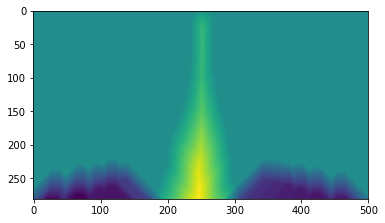

In [377]:
plt.imshow(min_seam)
plt.show()

In [240]:


j_min = 0
for j in range(1,im.shape[1]-1):
    if (min_seam[im.shape[0]-1,j]<min_seam[im.shape[0]-1,j_min]):
        j_min = j
for i in range(im.shape[0]-1,0):
    for j in range(j_min,im.shape[1]-2):
        im[i,j] = im[i,j+1]
        min_seam[i,j] = min_seam[i, j +1]
    if i != 0:
        if j_min != 0 and j_min != im.shape[1]-1:
            j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
        elif j_min == 0:
            j_min = j_min + min2(min_seam[i-1, j_min-1],min_seam[i-1, j_min ]) 
        else :
            j_min = j_min + min2(min_seam[i-1, j_min],min_seam[i-1, j_min + 1]) - 1
im = np.delete( im , im.shape[0]-1, axis = 1)
min_seam = np.delete( min_seam , im.shape[0]-1, axis = 1)

In [11]:
def delete_curve(im,min_seam, n):
    for i in range(1,n):
        j_min = 0
        for j in range(1,min_seam.shape[1]-1):
            if (min_seam[min_seam.shape[0]-1,j]<min_seam[min_seam.shape[0]-1,j_min]):
                j_min = j
        for i in range(min_seam.shape[0]-1,-1,-1):
            for j in range(j_min,min_seam.shape[1]-2):
                im[i,j] = im[i,j+1]
                min_seam[i,j] = min_seam[i, j +1]
            if i != 0:
                if j_min != 0 and j_min != min_seam.shape[1]-1:
                    j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
                elif j_min == 0:
                    j_min = j_min + min2(min_seam[i-1, j_min-1],min_seam[i-1, j_min ]) 
                else :
                    j_min = j_min + min2(min_seam[i-1, j_min],min_seam[i-1, j_min + 1]) - 1
        min_seam = np.delete( min_seam , min_seam.shape[0]-1, axis = 1)
    im = im[:,0:im.shape[1]-1-n,:]
    return im

plt.imshow(delete_curve(im,min_seam, 200))
plt.show()

KeyboardInterrupt: 

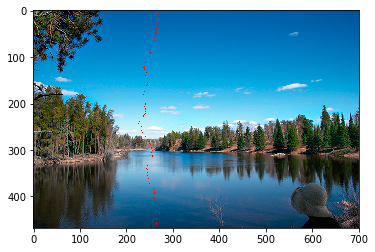

In [137]:
j_min = 0
mask_seam = np.zeros( (img.shape[0],img.shape[1]), dtype=np.uint8)
for j in range(1,im.shape[1]-1):
    if min_seam[im.shape[0]-1,j]<min_seam[im.shape[0]-1,j_min]:
        j_min = j
for i in range(im.shape[0]-1,-1,-1):
    im[i,j_min,0] = 1
    im[i,j_min,1] = 0
    im[i,j_min,2] = 0
    #print(i, j_min)
    min_seam[i,j_min] = im.shape[0]*im.shape[1]*256
    mask_seam[i,j_min] = 1
    if i != 0: 
        if j_min >= im.shape[1] -1:
            j_min = j_min + min2(min_seam[i-1, j_min -1 ],min_seam[i-1, j_min]) - 1
        elif j_min == 0:
            j_min = j_min + min2(min_seam[i-1, j_min],min_seam[i-1, j_min +1]) 
        else :
             j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
plt.imshow(im)
plt.show()

In [27]:
j_min

644

In [322]:
print(im.shape)
print(min_seam.shape)
print(grad.shape)

(475, 700, 3)
(475, 700)
(475, 700)


In [306]:
for index, x in np.ndenumerate(min_seam):
    print(index, x)

(0, 0) 2.23039
(0, 1) 3.07893
(0, 2) 4.30825
(0, 3) 2.63019
(0, 4) 5.25686
(0, 5) 7.27098
(0, 6) 1.74168
(0, 7) 3.00957
(0, 8) 1.77508
(0, 9) 4.24864
(0, 10) 2.5771
(0, 11) 4.81006
(0, 12) 6.60127
(0, 13) 3.31345
(0, 14) 8.6626
(0, 15) 4.30283
(0, 16) 4.35822
(0, 17) 1.42521
(0, 18) 3.6047
(0, 19) 2.60303
(0, 20) 2.19836
(0, 21) 6.30778
(0, 22) 5.32954
(0, 23) 1.16459
(0, 24) 6.59621
(0, 25) 4.9768
(0, 26) 1.80379
(0, 27) 1.16574
(0, 28) 6.60967
(0, 29) 2.32458
(0, 30) 3.44402
(0, 31) 2.29527
(0, 32) 1.88358
(0, 33) 3.87794
(0, 34) 3.50749
(0, 35) 4.90269
(0, 36) 1.34021
(0, 37) 3.08106
(0, 38) 0.465577
(0, 39) 0.697274
(0, 40) 2.39141
(0, 41) 1.44145
(0, 42) 0.569516
(0, 43) 2.27911
(0, 44) 2.87604
(0, 45) 0.411898
(0, 46) 1.17416
(0, 47) 1.20956
(0, 48) 4.35845
(0, 49) 0.942049
(0, 50) 2.96025
(0, 51) 2.45724
(0, 52) 2.70203
(0, 53) 3.49519
(0, 54) 4.55548
(0, 55) 1.37032
(0, 56) 0.533275
(0, 57) 1.61347
(0, 58) 1.82911
(0, 59) 2.69932
(0, 60) 2.67899
(0, 61) 3.44447
(0, 62) 1.69115


(2, 33) 6.74733
(2, 34) 2.8628
(2, 35) 6.1507
(2, 36) 5.68601
(2, 37) 6.32457
(2, 38) 2.55178
(2, 39) 4.57376
(2, 40) 3.68167
(2, 41) 8.36784
(2, 42) 5.29679
(2, 43) 7.98735
(2, 44) 3.89317
(2, 45) 5.93656
(2, 46) 2.16606
(2, 47) 6.40304
(2, 48) 5.60892
(2, 49) 8.26306
(2, 50) 6.61412
(2, 51) 5.63069
(2, 52) 4.21931
(2, 53) 8.01479
(2, 54) 9.80082
(2, 55) 5.17774
(2, 56) 7.0182
(2, 57) 6.13523
(2, 58) 6.10941
(2, 59) 5.02234
(2, 60) 3.88084
(2, 61) 3.75196
(2, 62) 4.56175
(2, 63) 4.91346
(2, 64) 3.43239
(2, 65) 6.35427
(2, 66) 1.98392
(2, 67) 3.43516
(2, 68) 2.88234
(2, 69) 4.63893
(2, 70) 3.69737
(2, 71) 4.78734
(2, 72) 4.42561
(2, 73) 4.8468
(2, 74) 2.92391
(2, 75) 7.50604
(2, 76) 9.2341
(2, 77) 4.81704
(2, 78) 3.90636
(2, 79) 5.73796
(2, 80) 3.2461
(2, 81) 5.51126
(2, 82) 4.95322
(2, 83) 7.38397
(2, 84) 5.42254
(2, 85) 4.87629
(2, 86) 5.16083
(2, 87) 5.03416
(2, 88) 6.54934
(2, 89) 5.67573
(2, 90) 4.4293
(2, 91) 4.04647
(2, 92) 6.75096
(2, 93) 3.4489
(2, 94) 6.20127
(2, 95) 5.29678


(3, 386) 0.665717
(3, 387) 0.599582
(3, 388) 0.866056
(3, 389) 1.32146
(3, 390) 0.915748
(3, 391) 1.29731
(3, 392) 0.810444
(3, 393) 1.34069
(3, 394) 0.908533
(3, 395) 1.06939
(3, 396) 1.44515
(3, 397) 0.790047
(3, 398) 1.00809
(3, 399) 0.992806
(3, 400) 0.817079
(3, 401) 1.18223
(3, 402) 0.703738
(3, 403) 1.2261
(3, 404) 0.814904
(3, 405) 1.25721
(3, 406) 0.843852
(3, 407) 1.44092
(3, 408) 1.59141
(3, 409) 1.43979
(3, 410) 1.68645
(3, 411) 1.54676
(3, 412) 1.37808
(3, 413) 0.817166
(3, 414) 1.40233
(3, 415) 0.723436
(3, 416) 1.10645
(3, 417) 0.552774
(3, 418) 0.774717
(3, 419) 1.63111
(3, 420) 2.65727
(3, 421) 1.6288
(3, 422) 1.23627
(3, 423) 1.35433
(3, 424) 0.99936
(3, 425) 0.766033
(3, 426) 0.795285
(3, 427) 0.98476
(3, 428) 1.07209
(3, 429) 1.36388
(3, 430) 1.44697
(3, 431) 0.364949
(3, 432) 0.832617
(3, 433) 0.629594
(3, 434) 1.32358
(3, 435) 0.647263
(3, 436) 0.666621
(3, 437) 1.23015
(3, 438) 0.846614
(3, 439) 0.712142
(3, 440) 0.832352
(3, 441) 0.732385
(3, 442) 0.916012
(3, 4

KeyboardInterrupt: 

In [211]:
from skimage.io import imsave
imsave('/home/tamerlan/CV/task2/img_ch.png',np.uint8(im*255))

In [121]:
def min2(a,b):
    if a<b :
        return 0
    else :
        return 1

def min3(a,b,c):
    if a<b and a<c:
        return -1
    elif c<b:
        return 1
    else :
        return 0

min_seam = np.zeros( (im.shape[0],im.shape[1]), dtype=np.float32)
min_seam[...,0] = grad[...,0]
for j in range(1,im.shape[1]):
    for i in range(im.shape[0]):
        if i == 0:
            min_ind = i + min2(min_seam[i,j-1],min_seam[i+1,j-1]  )
        elif i == im.shape[0]-1: 
            min_ind = i + min2(min_seam[i-1,j-1],min_seam[i,j-1] ) - 1
        else:
            min_ind = i + min3(min_seam[i-1,j-1],min_seam[i,j-1],min_seam[i+1,j-1]  ) 
        min_seam[i,j] = grad[i,j] + min_seam[min_ind,j-1]

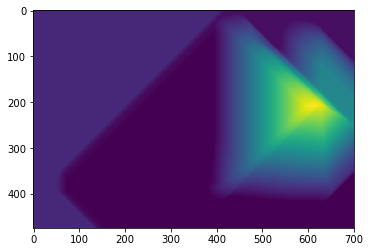

In [122]:
plt.imshow(min_seam)
plt.show()

In [365]:
direction = 'horizontal'
img = im
mask_seam = np.zeros( (img.shape[0],img.shape[1]), dtype=np.uint8)
if direction == 'horizontal':
        min_seam = np.zeros( (img.shape[0],img.shape[1]), dtype=np.float32)
        min_seam[0,...] = grad[0,...]
        for i in range(1, img.shape[0]):
            for j in range(0,img.shape[1]):
                if j == 0:
                    min_ind = j + min2(min_seam[i-1,j],min_seam[i-1,j+1]  )
                elif j == img.shape[1]-1: 
                    min_ind = j + min2(min_seam[i-1,j-1],min_seam[i-1,j] ) - 1
                else:
                    min_ind = j + min3(min_seam[i-1,j-1],min_seam[i-1,j],min_seam[i-1,j+1]  ) 
                min_seam[i,j] = grad[i,j] + min_seam[i-1,min_ind]
        j_min = 0
        for j in range(1,img.shape[1]):
            if min_seam[img.shape[0]-1,j]<min_seam[img.shape[0]-1,j_min]:
                j_min = j
        for i in range(img.shape[0]-1,-1,-1):
            mask_seam[i,j_min] = 255
            img[i,j_min:grad.shape[1]-1] = img[i,j_min + 1:grad.shape[1]] 
            mask[i,j_min:grad.shape[1]-1] = mask[i,j_min + 1:grad.shape[1]] 
            #print(i, j_min)
            #min_seam[i,j_min] = img.shape[0]*img.shape[1]*256
            if i != 0: 
                if j_min >= img.shape[1] -1:
                    j_min = j_min + min2(min_seam[i-1, j_min -1 ],min_seam[i-1, j_min]) - 1
                elif j_min == 0:
                     j_min = j_min + min2(min_seam[i-1, j_min],min_seam[i-1, j_min +1]) 
                else :
                     j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
        #img = np.delete(img,img.shape[1]-1)

In [379]:

plt.imshow(img)
plt.show()

TypeError: Invalid dimensions for image data

In [367]:
from skimage.io import imsave
imsave('/home/tamerlan/CV/task2/img_res.png',mask_seam)

/home/tamerlan/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/tamerlan/CV/task2/img_res.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [204]:
def min2(a,b):
    if a<=b :
        return 0
    else :
        return 1

def min3(a,b,c):
    if a<=b and a<=c:
        return -1
    elif c<b:
        return 1
    else :
        return 0

min_seam = np.zeros( (grad.shape[0],grad.shape[1]), dtype=np.float32)
min_seam[...,0] = grad[...,0]
for j in range(1,grad.shape[1]):
    for i in range(grad.shape[0]):
        if i == 0:
            min_ind = i + min2(min_seam[i,j-1],min_seam[i+1,j-1]  )
        elif i == grad.shape[0]-1: 
            min_ind = i + min2(min_seam[i-1,j-1],min_seam[i,j-1] ) - 1
        else:
            min_ind = i + min3(min_seam[i-1,j-1],min_seam[i,j-1],min_seam[i+1,j-1]  ) 
        min_seam[i,j] = grad[i,j] + min_seam[min_ind,j-1]

In [205]:
grad = np.array([[3,4,3,5],[5,4,5,6],[1,1,1,1]])

array([[3, 4, 3, 5],
       [5, 4, 5, 6],
       [1, 1, 1, 1]])

In [206]:
min_seam

array([[  3.,   7.,   8.,  12.],
       [  5.,   5.,   7.,   9.],
       [  1.,   2.,   3.,   4.]], dtype=float32)

In [208]:
mask_seam

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [255, 255, 255, 255]], dtype=uint8)

In [195]:
min_seam = np.zeros( (grad.shape[0],grad.shape[1]), dtype=np.float32)
min_seam[0,...] = grad[0,...]
for i in range(1, grad.shape[0]):
    for j in range(0,grad.shape[1]):
        if j == 0:
            min_ind = j + min2(min_seam[i-1,j],min_seam[i-1,j+1]  )
        elif j == grad.shape[1]-1: 
            min_ind = j + min2(min_seam[i-1,j-1],min_seam[i-1,j] ) - 1
        else:
            min_ind = j + min3(min_seam[i-1,j-1],min_seam[i-1,j],min_seam[i-1,j+1]  ) 
        min_seam[i,j] = grad[i,j] + min_seam[i-1,min_ind]

In [207]:
direction = 'horizontal'
img = grad
mask_seam = np.zeros( (img.shape[0],img.shape[1]), dtype=np.uint8)
if direction == 'horizontal':
        j_min = 0
        for j in range(1,img.shape[1]):
            if min_seam[img.shape[0]-1,j]<min_seam[img.shape[0]-1,j_min]:
                j_min = j
        for i in range(img.shape[0]-1,-1,-1):
            mask_seam[i,j_min] = 255
            #print(i, j_min)
            #min_seam[i,j_min] = img.shape[0]*img.shape[1]*256
            if i != 0: 
                if j_min > img.shape[1] -1:
                    j_min = j_min + min2(min_seam[i-1, j_min -1 ],min_seam[i-1, j_min]) - 1
                elif j_min == 0:
                     j_min = j_min + min2(min_seam[i-1, j_min],min_seam[i-1, j_min +1]) 
                else :
                     j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
else :
        i_min = 0
        for i in range(1,img.shape[0]):
            if min_seam[i,img.shape[1]-1]<=min_seam[i_min, img.shape[1]-1]:
                i_min = i
        for j in range(img.shape[1]-1,-1,-1):
            mask_seam[i_min,j] = 255
            #print(i, j_min)
            #min_seam[i,j_min] = img.shape[0]*img.shape[1]*256
            if j != 0: 
                if i_min >= img.shape[0] -1:
                    i_min = i_min + min2(min_seam[i_min-1, j-1 ],min_seam[i_min, j-1]) - 1
                elif i_min == 0:
                    i_min = i_min + min2(min_seam[i_min,j-1],min_seam[i_min+1,j-1]) 
                else :
                    i_min = i_min + min3(min_seam[i_min-1,j-1],min_seam[i_min,j-1],min_seam[i_min +1,j-1] )

In [380]:
from math import sqrt 
import numpy as np

def min2_p(a,b):
    if a<=b :
        return 0
    else :
        return 1
    
def min2_n(a,b):
    if a<=b :
        return -1
    else :
        return 0

def min3(a,b,c):
    if a<=b and a<=c:
        return -1
    elif b<=c :
        return 0
    else :
        return 1

def seam_carve(img, mode_param, mask):
    direction,mode = mode_param.split()
    Y = np.dot(img, np.array([0.299, 0.587, 0.114]))
    
    grad_x = np.roll(Y,1,0) - np.roll(Y,-1,0)
    grad_x[0] = Y[1,:] - Y[0,:]
    grad_x[grad_x.shape[0]-1,:] = Y[grad_x.shape[0]-1,:] - Y[grad_x.shape[0]-2,:]
    grad_y = np.roll(Y,-1,1) - np.roll(Y,1,1)
    grad_y[:,0] = Y[:,1] - Y[:,0]
    grad_y[:,grad_y.shape[1]-1] = Y[:,grad_x.shape[1]-1] - Y[:,grad_x.shape[1]-2]
    grad = (grad_x**2 + grad_y**2)**(0.5)

    if mask is not None:
        grad = grad + mask*1000.0
    if direction != 'horizontal':
        grad = grad.transpose()
        img = img.transpose((1,0,2))
        
    mask_seam = np.zeros((grad.shape[0],grad.shape[1]))
    min_seam = np.zeros( (grad.shape[0],grad.shape[1]))
    if mode=='shrink':
        w = grad.shape[1] - 1
    else :
        w = grad.shape[1] + 1
    result_img = np.zeros((grad.shape[0],w,3))
    
    min_seam[0,...] = grad[0,...]
    for i in range(1, grad.shape[0]):
        for j in range(grad.shape[1]):
            if j == 0:
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j],min_seam[i-1,j+1])
            elif j == grad.shape[1]-1: 
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j-1],min_seam[i-1,j] )
            else:
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j-1],min_seam[i-1,j],min_seam[i-1,j+1])
          
    j_min = 0
    for j in range(grad.shape[1]):
        if min_seam[grad.shape[0]-1,j] < min_seam[grad.shape[0]-1,j_min]:
            j_min = j
            
    for i in range(grad.shape[0]-1,-1,-1):
        mask_seam[i,j_min] = 255 
        
        result_img[i,:j_min] = img[i,:j_min]
        if mode=='shrink':
            result_img[i,j_min:w] = img[i,j_min+1:w+1]
        else :
            result_img[i,j_min+2:w] = img[i,j_min+1:grad.shape[1]]
            result_img[i,j_min+1] = (img[i,j_min] + img[i,j_min+1])/2
        if i != 0: 
            if j_min == grad.shape[1] -1:
                j_min = j_min + min2_n(min_seam[i-1, j_min -1 ],min_seam[i-1, j_min])
            elif j_min == 0:
                j_min = j_min + min2_p(min_seam[i-1, j_min],min_seam[i-1, j_min +1]) 
            else :
                j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
    if direction != 'horizontal':
        mask_seam = mask_seam.transpose()
        result_img = result_img.transpose(1,0,2)
    return result_img,mask, mask_seam

In [387]:
r_i,r_m,m_s = seam_carve(im,'horizontal shrink',None)#convert_img_to_mask(mask))

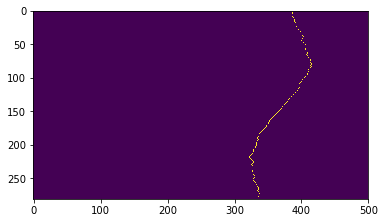

In [388]:
plt.imshow(m_s)
plt.show()

In [1]:
from math import sqrt 
import numpy as np

def min2_p(a,b):
    if a<=b :
        return 0
    else :
        return 1
    
def min2_n(a,b):
    if a<=b :
        return -1
    else :
        return 0

def min3(a,b,c):
    if a<=b and a<=c:
        return -1
    elif b<=c :
        return 0
    else :
        return 1

def seam_carve(img, mode_param, mask):
    direction,mode = mode_param.split()
    Y = np.dot(img, np.array([0.299, 0.587, 0.114]))
    
    grad_x = np.roll(Y,1,0) - np.roll(Y,-1,0)
    grad_x[0] = Y[1,:] - Y[0,:]
    grad_x[grad_x.shape[0]-1,:] = Y[grad_x.shape[0]-1,:] - Y[grad_x.shape[0]-2,:]
    grad_y = np.roll(Y,-1,1) - np.roll(Y,1,1)
    grad_y[:,0] = Y[:,1] - Y[:,0]
    grad_y[:,grad_y.shape[1]-1] = Y[:,grad_x.shape[1]-1] - Y[:,grad_x.shape[1]-2]
    grad = (grad_x**2 + grad_y**2)**(0.5)

    if mask is not None:
        grad = grad + mask*1000.0
    if direction != 'horizontal':
        grad = grad.transpose()
        img = img.transpose((1,0,2))
        if mask is not None:
            mask = mask.transpose()
            
        
    mask_seam = np.zeros((grad.shape[0],grad.shape[1]))
    min_seam = np.zeros( (grad.shape[0],grad.shape[1]))
    if mode=='shrink':
        w = grad.shape[1] - 1
    else :
        w = grad.shape[1] + 1
    result_img = np.zeros((grad.shape[0],w,3))
    result_mask = np.zeros((grad.shape[0],w))
    
    min_seam[0,...] = grad[0,...]
    for i in range(1, grad.shape[0]):
        for j in range(grad.shape[1]):
            if j == 0:
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j],min_seam[i-1,j+1])
            elif j == grad.shape[1]-1: 
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j-1],min_seam[i-1,j] )
            else:
                min_seam[i,j] = grad[i,j] + min(min_seam[i-1,j-1],min_seam[i-1,j],min_seam[i-1,j+1])
          
    j_min = 0
    for j in range(grad.shape[1]):
        if min_seam[grad.shape[0]-1,j] < min_seam[grad.shape[0]-1,j_min]:
            j_min = j
            
    for i in range(grad.shape[0]-1,-1,-1):
        mask_seam[i,j_min] = 255 
        
        ############ Сжатие или расширение изображения и маски(если есть) ################
        result_img[i,:j_min] = img[i,:j_min]
        if mask is not None :
            result_mask[i,:j_min] = mask[i,:j_min]
        if mode=='shrink':
            result_img[i,j_min:w] = img[i,j_min+1:w+1]
            if mask is not None :
                result_mask[i,j_min:w] = mask[i,j_min+1:w+1]
        elif j_min !=  grad.shape[1] -1 :
            result_img[i,j_min+2:w] = img[i,j_min+1:grad.shape[1]]
            result_img[i,j_min+1] = (img[i,j_min] + img[i,j_min+1])/2
            if mask is not None :
                result_mask[i,j_min+2:w] = mask[i,j_min+1:grad.shape[1]]
                result_mask[i,j_min+1] = (mask[i,j_min] + mask[i,j_min+1])/2
        ##################################################################################
        if i != 0: 
            if j_min == grad.shape[1] -1:
                j_min = j_min + min2_n(min_seam[i-1, j_min -1 ],min_seam[i-1, j_min])
            elif j_min == 0:
                j_min = j_min + min2_p(min_seam[i-1, j_min],min_seam[i-1, j_min +1]) 
            else :
                j_min = j_min + min3(min_seam[i-1, j_min-1],min_seam[i-1, j_min],min_seam[i-1, j_min +1] )
    if direction != 'horizontal':
        mask_seam = mask_seam.transpose()
        result_img = result_img.transpose(1,0,2)
        result_mask = result_mask.transpose()
    return result_img,result_mask, mask_seam



In [129]:
from skimage.io  import imsave
imsave('/home/tamerlan/CV/task2/fotka_mask.jpg', new_m)

/home/tamerlan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [130]:
mask = imread('/home/tamerlan/CV/task2/fotka_mask.jpg',plugin ='matplotlib')

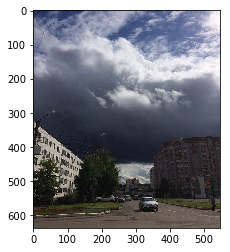

In [163]:
plt.imshow(im/255.)
plt.show()

In [112]:
from skimage import color
mask = color.rgb2gray(mask)

In [136]:
mask = - mask[...,0]/255. + mask[...,1]/255.

In [27]:
new_mask = np.zeros((mask.shape[0],mask.shape[1],3))

255

In [96]:
im.shape

(637, 571, 3)

In [53]:
mask.shape

(637, 631)

In [138]:
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)

In [34]:
mask = mask[...,0]

In [36]:
mask = np.where(mask==1, -1, 0)

In [119]:
new_m = np.zeros((mask.shape[0],mask.shape[1],3))
new_m[...,0] = mask[...,0]
new_m[...,1] = new_mask

In [124]:
new_m[...,0] = np.where(new_m[...,0] >0,1,0)
new_m[...,1] = np.where(new_m[...,1] >0,1,0)

In [162]:
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)
im, mask, seam = seam_carve(im, 'horizontal shrink', mask)

array([[[  34.,   47.,   89.],
        [  35.,   48.,   90.],
        [  35.,   48.,   90.],
        ..., 
        [ 233.,  232.,  237.],
        [ 243.,  242.,  247.],
        [ 243.,  247.,  250.]],

       [[  35.,   48.,   90.],
        [  37.,   50.,   92.],
        [  37.,   50.,   92.],
        ..., 
        [ 242.,  240.,  245.],
        [ 246.,  245.,  250.],
        [ 249.,  250.,  254.]],

       [[  36.,   49.,   91.],
        [  36.,   49.,   91.],
        [  37.,   50.,   92.],
        ..., 
        [ 249.,  247.,  252.],
        [ 252.,  251.,  255.],
        [ 255.,  255.,  255.]],

       ..., 
       [[  90.,   80.,   71.],
        [  87.,   77.,   68.],
        [  84.,   74.,   65.],
        ..., 
        [ 115.,   98.,   91.],
        [ 114.,   97.,   90.],
        [ 111.,   94.,   87.]],

       [[  87.,   77.,   68.],
        [  84.,   74.,   65.],
        [  81.,   71.,   62.],
        ..., 
        [ 117.,  103.,   94.],
        [ 119.,  105.,   96.],
        [ 